In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import PIL
from google.colab import drive
drive.mount('/content/drive')
from tensorflow.keras.models import load_model

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image_dataset_from_directory

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2',
    seed=42,
    image_size=(180,180),
    batch_size=50,
)
class_names = test_ds.class_names

Found 3237 files belonging to 157 classes.


In [ ]:
class_names

['acuraintegra',
 'acurarl',
 'acuratl',
 'acuratsx',
 'acurazdx',
 'amgeneral',
 'astonmartin',
 'audi100',
 'audia5',
 'audir8',
 'audirs',
 'audis4',
 'audis5',
 'audis6',
 'auditt',
 'auditts',
 'audiv8',
 'bentleyarnage',
 'bentleycontinental',
 'bentleymulsanne',
 'bmw1',
 'bmw3',
 'bmw6',
 'bmwactivehybrid',
 'bmwm3',
 'bmwm5',
 'bmwm6',
 'bmwx3',
 'bmwx5',
 'bmwx6',
 'bmwz4',
 'bugattiveyron',
 'buickenclave',
 'buickrainier',
 'buickregal',
 'buickverano',
 'cadillaccts-v',
 'cadillacescalade',
 'cadillacsrx',
 'chevroletavalanche',
 'chevroletcamaro',
 'chevroletcobalt',
 'chevroletcorvette',
 'chevroletexpress',
 'chevrolethhr',
 'chevroletimpala',
 'chevroletmalibu',
 'chevroletmonte',
 'chevroletsilverado',
 'chevroletsonic',
 'chevrolettahoe',
 'chevrolettrailblazer',
 'chevrolettraverse',
 'chrysler300',
 'chrysleraspen',
 'chryslercrossfire',
 'chryslerpt',
 'chryslersebring',
 'chryslertown',
 'daewoonubira',
 'dodgecaliber',
 'dodgecaravan',
 'dodgechallenger',
 'dodg

# CNN

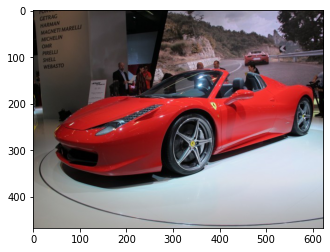

Prediction: ferrari458 with a 93.10 percent confidence.


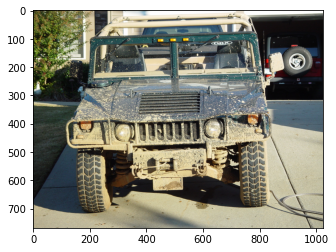

Prediction: chevroletimpala with a 26.78 percent confidence.


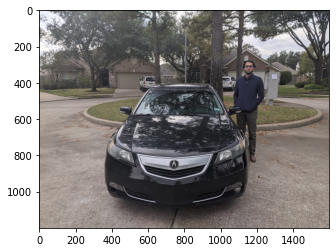

Prediction: landrover with a 35.86 percent confidence.


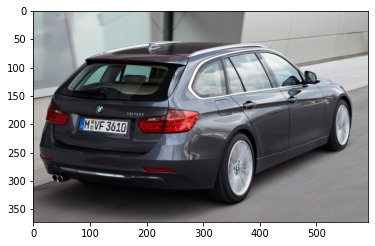

Prediction: jeepgrand with a 37.35 percent confidence.


In [ ]:
car_path = ["/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/ferrari458/008410.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/amgeneral/000001.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/calling_best_saved_models_ijp/acura_tl.jpeg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/bmw3/002389.jpg"]
image_size = (200, 200)
model = load_model('/content/drive/Shareddrives/apm_cnn_trial/trial_2/regular_cnn/saved_models/plain_cnn_10')
#car_path = ["/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/ferrari458/008410.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/amgeneral/000001.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/calling_best_saved_models_ijp/acura_tl_2.jpeg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/calling_best_saved_models_ijp/bmw_3.jpeg"]
for car in car_path:

  image = load_img(car, target_size=image_size)
  image = img_to_array(image)
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  temp = plt.imread(car)
  plt.imshow(temp)
  plt.show()
  predictions = model.predict(image)
  score = tf.nn.softmax(predictions[0])
  print(
      "Prediction: {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score)))

# ResNet 50

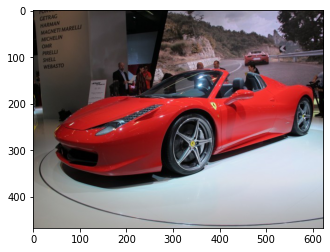

Prediction: ferrari458 with a 1.71 percent confidence.


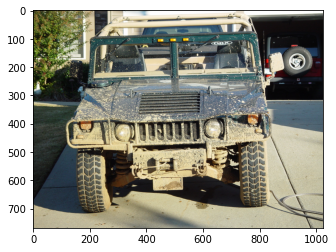

Prediction: amgeneral with a 1.64 percent confidence.


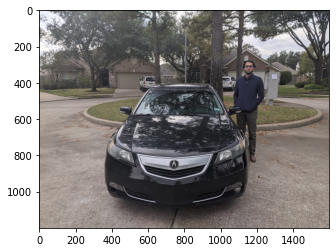

Prediction: acuratl with a 1.36 percent confidence.


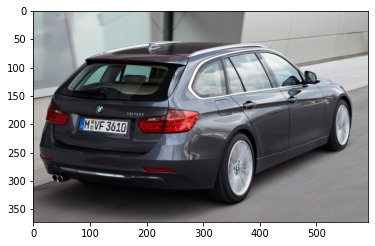

Prediction: bmw3 with a 1.71 percent confidence.


In [ ]:
model = load_model('/content/drive/Shareddrives/apm_cnn_trial/trial_2/transfer_learning_brand_and_model/saved_models/resnet_50_brand_model_1')
image_size = (224, 224)
car_path = ["/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/ferrari458/008410.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/amgeneral/000001.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/calling_best_saved_models_ijp/acura_tl.jpeg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/bmw3/002389.jpg"]
#car_path = ["/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/ferrari458/008410.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/amgeneral/000001.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/calling_best_saved_models_ijp/acura_tl_2.jpeg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/calling_best_saved_models_ijp/bmw_3.jpeg"]
for car in car_path:

  image = load_img(car, target_size=image_size)
  image = img_to_array(image)
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  temp = plt.imread(car)
  plt.imshow(temp)
  plt.show()
  image = keras.applications.resnet50.preprocess_input(image)
  predictions = model.predict(image)
  score = tf.nn.softmax(predictions[0])
  print(
      "Prediction: {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score)))

# InceptionV3

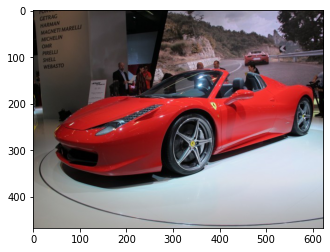

Prediction: ferrari458 with a 1.71 percent confidence.


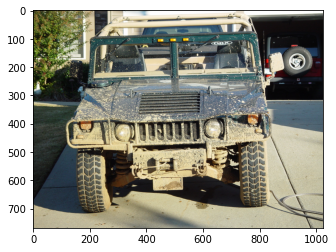

Prediction: amgeneral with a 1.71 percent confidence.


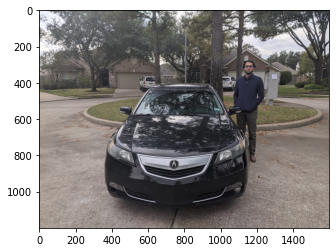

Prediction: suzukisx4 with a 1.42 percent confidence.


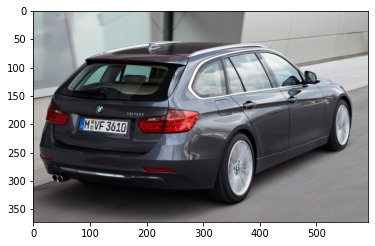

Prediction: bmw3 with a 1.71 percent confidence.


In [ ]:
model = load_model('/content/drive/Shareddrives/apm_cnn_trial/trial_2/transfer_learning_brand_and_model/saved_models/inception_v3_brand_model_5')
image_size = (299, 299)
car_path = ["/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/ferrari458/008410.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/amgeneral/000001.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/calling_best_saved_models_ijp/acura_tl.jpeg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/bmw3/002389.jpg"]
#car_path = ["/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/ferrari458/008410.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/amgeneral/000001.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/calling_best_saved_models_ijp/acura_tl_2.jpeg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/calling_best_saved_models_ijp/bmw_3.jpeg"]
for car in car_path:

  image = load_img(car, target_size=image_size)
  image = img_to_array(image)
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  temp = plt.imread(car)
  plt.imshow(temp)
  plt.show()
  image = keras.applications.inception_v3.preprocess_input(image)
  predictions = model.predict(image)
  score = tf.nn.softmax(predictions[0])
  print(
      "Prediction: {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score)))

# VGG16

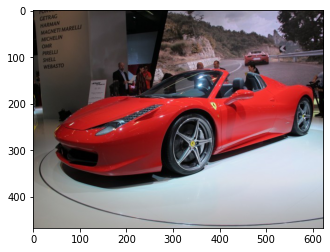

This image most likely belongs to ferrari458 with a 1.71 percent confidence.


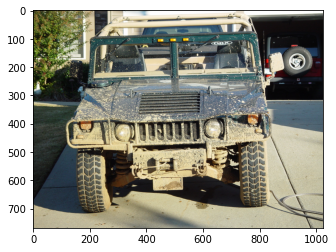

This image most likely belongs to jeepwrangler with a 1.71 percent confidence.


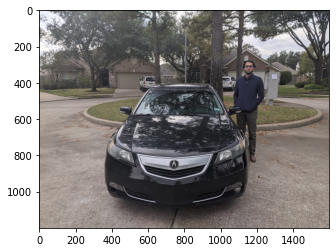

This image most likely belongs to fordgt with a 1.71 percent confidence.


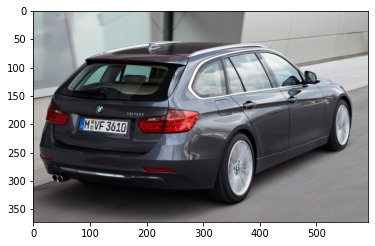

This image most likely belongs to bmw3 with a 1.71 percent confidence.


In [ ]:
#model = load_model('/content/drive/Shareddrives/apm_cnn_trial/trial_2/transfer_learning_brand_and_model/saved_models/vgg16_brand_model_5')
model = load_model('/content/drive/Shareddrives/apm_cnn_trial/trial_2/transfer_learning_brand_and_model/saved_models/vgg16_model_jenny')
#car_path = ["/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/ferrari458/008410.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/amgeneral/000001.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/calling_best_saved_models_ijp/acura_tl_2.jpeg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/calling_best_saved_models_ijp/bmw_3.jpeg"]
image_size = (224, 224)

car_path = ["/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/ferrari458/008410.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/amgeneral/000001.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/calling_best_saved_models_ijp/acura_tl.jpeg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/bmw3/002389.jpg"]
for car in car_path:
  image = load_img(car, target_size=image_size)
  # convert the image pixels to a numpy array
  image = img_to_array(image)
  # reshape data for the model
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  temp = plt.imread(car)
  plt.imshow(temp)
  plt.show()
  #image = keras.applications.vgg16.preprocess_input(image)
  predictions = model.predict(image)
  score = tf.nn.softmax(predictions[0])
  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score)))

# Resnet 101

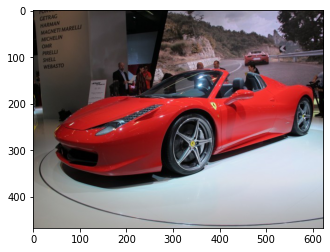

Prediction: chevroletcorvette with a 1.44 percent confidence.


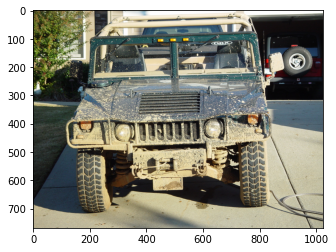

Prediction: amgeneral with a 1.70 percent confidence.


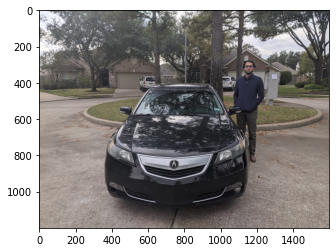

Prediction: acuratl with a 1.67 percent confidence.


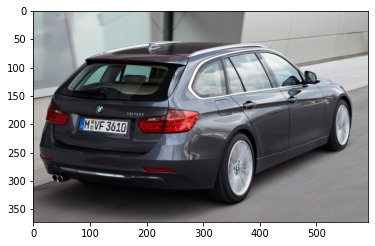

Prediction: bmw3 with a 1.71 percent confidence.


In [ ]:
model = load_model('/content/drive/Shareddrives/apm_cnn_trial/trial_2/transfer_learning_brand_and_model/saved_models/resnet_101_brand_model_4')
image_size = (224, 224)
car_path = ["/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/ferrari458/008410.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/amgeneral/000001.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/calling_best_saved_models_ijp/acura_tl.jpeg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/bmw3/002389.jpg"]
#car_path = ["/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/ferrari458/008410.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/amgeneral/000001.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/calling_best_saved_models_ijp/acura_tl_2.jpeg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/calling_best_saved_models_ijp/bmw_3.jpeg"]
for car in car_path:

  image = load_img(car, target_size=image_size)
  image = img_to_array(image)
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  temp = plt.imread(car)
  plt.imshow(temp)
  plt.show()
  image = keras.applications.resnet.preprocess_input(image)
  predictions = model.predict(image)
  score = tf.nn.softmax(predictions[0])
  print(
      "Prediction: {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score)))

# XCEPTION

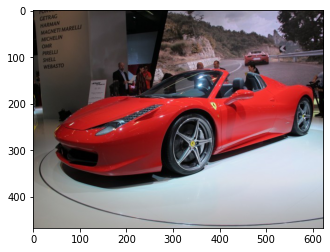

Prediction: chevroletcorvette with a 40.07 percent confidence.


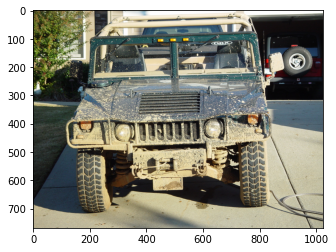

Prediction: mitsubishilancer with a 28.15 percent confidence.


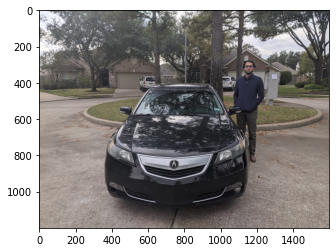

Prediction: mitsubishilancer with a 94.68 percent confidence.


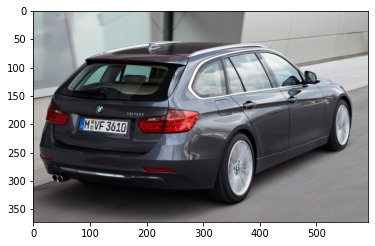

Prediction: lamborghinireventon with a 98.00 percent confidence.


In [ ]:
model = load_model('/content/drive/Shareddrives/apm_cnn_trial/trial_2/transfer_learning_brand_and_model/saved_models/Xception_1')
image_size = (224, 224)
car_path = ["/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/ferrari458/008410.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/amgeneral/000001.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/calling_best_saved_models_ijp/acura_tl.jpeg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/bmw3/002389.jpg"]
#car_path = ["/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/ferrari458/008410.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2/amgeneral/000001.jpg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/calling_best_saved_models_ijp/acura_tl_2.jpeg","/content/drive/Shareddrives/apm_cnn_trial/trial_2/calling_best_saved_models_ijp/bmw_3.jpeg"]
for car in car_path:

  image = load_img(car, target_size=image_size)
  image = img_to_array(image)
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  temp = plt.imread(car)
  plt.imshow(temp)
  plt.show()
  image = keras.applications.resnet.preprocess_input(image)
  predictions = model.predict(image)
  score = tf.nn.softmax(predictions[0])
  print(
      "Prediction: {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score)))